In [1]:
import pandas as pd
import jieba
mendeley_df = pd.read_csv("processed_data/mendeley_df.csv")
uci_df = pd.read_csv("processed_data/uci_df.csv")
chinese_text_classification_df = pd.read_csv("processed_data/chinese_text_classification_df.csv")
fbs_sms_df = pd.read_csv("processed_data/fbs_sms_df.csv")

## top words and n-grams

In [2]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer

# Function to get top N words
def get_top_n_words(corpus, n=None, ngram_range=(1, 1)):
    vec = CountVectorizer(token_pattern=r"(?u)\b\w+\b", ngram_range=ngram_range).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)
    return words_freq[:n]

# Function to print top words
def print_top_words(words_freq, title):
    print(f"\n{title}")
    print(f"{'Word':<30} {'Frequency'}")
    print("="*40)
    for word, freq in words_freq:
        print(f"{word:<30} {freq}")

# Analyze and print top words for each label in the dataframe
def analyze_dataframe_by_label(df, title, labels, ngram_range=(1, 1)):
    for label in labels:
        filtered_df = df[df['LABEL'] == label].fillna({'TOKENIZED_TEXT': ''})
        if filtered_df.empty:
            print(f"\nNo data for label {label} in {title}")
            continue
        words_freq = get_top_n_words(filtered_df['TOKENIZED_TEXT'], 20, ngram_range)
        print_top_words(words_freq, f"{title} (Label {label}, {ngram_range} gram)")




In [5]:
# Analyze Mendeley dataset with different n-gram ranges
analyze_dataframe_by_label(mendeley_df, 'Top 20 Words in Mendeley Dataset', [1, 2], ngram_range=(1, 1))
analyze_dataframe_by_label(mendeley_df, 'Top 20 2-grams in Mendeley Dataset', [1, 2], ngram_range=(2, 2))
analyze_dataframe_by_label(mendeley_df, 'Top 20 3-grams in Mendeley Dataset', [1, 2], ngram_range=(3, 3))

# Analyze UCI SMS dataset with different n-gram ranges
analyze_dataframe_by_label(uci_df, 'Top 20 Words in UCI SMS Dataset', [1, 2], ngram_range=(1, 1))
analyze_dataframe_by_label(uci_df, 'Top 20 2-grams in UCI SMS Dataset', [1, 2], ngram_range=(2, 2))
analyze_dataframe_by_label(uci_df, 'Top 20 3-grams in UCI SMS Dataset', [1, 2], ngram_range=(3, 3))
# Analyze Chinese Text Classification dataset
analyze_dataframe_by_label(chinese_text_classification_df, 'Top 20 Words in Chinese Text Classification Dataset', [1, 2],ngram_range=(1, 1))
analyze_dataframe_by_label(chinese_text_classification_df, 'Top 20 2-grams in Chinese Text Classification Dataset', [1, 2], ngram_range=(2, 2))
analyze_dataframe_by_label(chinese_text_classification_df, 'Top 20 3-grams in Chinese Text Classification Dataset', [1, 2], ngram_range=(3, 3))
# Analyze FBS SMS dataset
analyze_dataframe_by_label(fbs_sms_df, 'Top 20 Words in FBS SMS Dataset', [1, 2],ngram_range=(1, 1))
analyze_dataframe_by_label(fbs_sms_df, 'Top 20 2-grams in FBS SMS Dataset', [1, 2], ngram_range=(2, 2))
analyze_dataframe_by_label(fbs_sms_df, 'Top 20 3-grams in FBS SMS Dataset', [1, 2], ngram_range=(3, 3))


Top 20 Words in Mendeley Dataset (Label 1, (1, 1) gram)
Word                           Frequency
phonenumber                    513
to                             445
a                              160
the                            157
free                           151
for                            149
your                           137
now                            126
txt                            119
call                           115
2                              109
and                            103
you                            101
on                             94
ur                             93
or                             91
stop                           90
text                           81
get                            80
4                              79

Top 20 Words in Mendeley Dataset (Label 2, (1, 1) gram)
Word                           Frequency
phonenumber                    997
to                             522
call                           386
you   

## Label DIstribution


In [6]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer

# Function to get top N words
def get_top_n_words(corpus, n=None, ngram_range=(1, 1)):
    vec = CountVectorizer(token_pattern=r"(?u)\b\w+\b", ngram_range=ngram_range).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)
    return words_freq[:n]

# Function to print top words
def print_top_words(words_freq, title):
    print(f"\n{title}")
    print(f"{'Word':<30} {'Frequency'}")
    print("="*40)
    for word, freq in words_freq:
        print(f"{word:<30} {freq}")

# Function to save top words to DataFrame
def save_top_words(words_freq, label, ngram_range):
    df = pd.DataFrame(words_freq, columns=['Word', 'Frequency'])
    df['Label'] = label
    df['Ngram_Range'] = f"{ngram_range[0]}-{ngram_range[1]}"
    return df

# Analyze and print top words for each label in the dataframe
def analyze_dataframe_by_label(df, title, labels, ngram_range=(1, 1)):
    all_results = []
    for label in labels:
        filtered_df = df[df['LABEL'] == label].fillna({'TOKENIZED_TEXT': ''})
        if filtered_df.empty:
            print(f"\nNo data for label {label} in {title}")
            continue
        words_freq = get_top_n_words(filtered_df['TOKENIZED_TEXT'], 20, ngram_range)
        print_top_words(words_freq, f"{title} (Label {label}, {ngram_range} gram)")
        all_results.append(save_top_words(words_freq, label, ngram_range))
    return pd.concat(all_results, ignore_index=True)

# Analyze Mendeley dataset with different n-gram ranges and save to a single CSV
mendeley_results_1gram = analyze_dataframe_by_label(mendeley_df, 'Top 20 Words in Mendeley Dataset', [1, 2], ngram_range=(1, 1))
mendeley_results_2gram = analyze_dataframe_by_label(mendeley_df, 'Top 20 2-grams in Mendeley Dataset', [1, 2], ngram_range=(2, 2))
mendeley_results_3gram = analyze_dataframe_by_label(mendeley_df, 'Top 20 3-grams in Mendeley Dataset', [1, 2], ngram_range=(3, 3))

# Combine all results into one DataFrame and save to CSV
all_mendeley_results = pd.concat([mendeley_results_1gram, mendeley_results_2gram, mendeley_results_3gram], ignore_index=True)
all_mendeley_results.to_csv('Mendeley_Top_Words.csv', index=False)
print("All results saved to Mendeley_Top_Words.csv")

# Analyze UCI SMS dataset with different n-gram ranges and save to a single CSV
uci_results_1gram = analyze_dataframe_by_label(uci_df, 'Top 20 Words in UCI SMS Dataset', [1, 2], ngram_range=(1, 1))
uci_results_2gram = analyze_dataframe_by_label(uci_df, 'Top 20 2-grams in UCI SMS Dataset', [1, 2], ngram_range=(2, 2))
uci_results_3gram = analyze_dataframe_by_label(uci_df, 'Top 20 3-grams in UCI SMS Dataset', [1, 2], ngram_range=(3, 3))

all_uci_results = pd.concat([uci_results_1gram, uci_results_2gram, uci_results_3gram], ignore_index=True)
all_uci_results.to_csv('UCI_SMS_Top_Words.csv', index=False)
print("All UCI SMS results saved to UCI_SMS_Top_Words.csv")

# Analyze Chinese Text Classification dataset with different n-gram ranges and save to a single CSV
chinese_results_1gram = analyze_dataframe_by_label(chinese_text_classification_df, 'Top 20 Words in Chinese Text Classification Dataset', [1, 2], ngram_range=(1, 1))
chinese_results_2gram = analyze_dataframe_by_label(chinese_text_classification_df, 'Top 20 2-grams in Chinese Text Classification Dataset', [1, 2], ngram_range=(2, 2))
chinese_results_3gram = analyze_dataframe_by_label(chinese_text_classification_df, 'Top 20 3-grams in Chinese Text Classification Dataset', [1, 2], ngram_range=(3, 3))

all_chinese_results = pd.concat([chinese_results_1gram, chinese_results_2gram, chinese_results_3gram], ignore_index=True)
all_chinese_results.to_csv('Chinese_Text_Classification_Top_Words.csv', index=False)
print("All Chinese Text Classification results saved to Chinese_Text_Classification_Top_Words.csv")

# Analyze FBS SMS dataset with different n-gram ranges and save to a single CSV
fbs_results_1gram = analyze_dataframe_by_label(fbs_sms_df, 'Top 20 Words in FBS SMS Dataset', [1, 2], ngram_range=(1, 1))
fbs_results_2gram = analyze_dataframe_by_label(fbs_sms_df, 'Top 20 2-grams in FBS SMS Dataset', [1, 2], ngram_range=(2, 2))
fbs_results_3gram = analyze_dataframe_by_label(fbs_sms_df, 'Top 20 3-grams in FBS SMS Dataset', [1, 2], ngram_range=(3, 3))

all_fbs_results = pd.concat([fbs_results_1gram, fbs_results_2gram, fbs_results_3gram], ignore_index=True)
all_fbs_results.to_csv('FBS_SMS_Top_Words.csv', index=False)
print("All FBS SMS results saved to FBS_SMS_Top_Words.csv")



Top 20 Words in Mendeley Dataset (Label 1, (1, 1) gram)
Word                           Frequency
phonenumber                    513
to                             445
a                              160
the                            157
free                           151
for                            149
your                           137
now                            126
txt                            119
call                           115
2                              109
and                            103
you                            101
on                             94
ur                             93
or                             91
stop                           90
text                           81
get                            80
4                              79

Top 20 Words in Mendeley Dataset (Label 2, (1, 1) gram)
Word                           Frequency
phonenumber                    997
to                             522
call                           386
you   

In [13]:
# Function to display label distribution
def display_label_distribution(df, title):
    print(f"\nLabel Distribution in {title}")
    print(df['LABEL'].value_counts())

# Display label distribution for each dataset
display_label_distribution(mendeley_df, 'Mendeley Dataset')
display_label_distribution(uci_df, 'UCI SMS Dataset')
display_label_distribution(chinese_text_classification_df, 'Chinese Text Classification Dataset')
display_label_distribution(fbs_sms_df, 'FBS SMS Dataset')


Label Distribution in Mendeley Dataset
LABEL
0.0    4844
2.0     616
1.0     466
Name: count, dtype: int64

Label Distribution in UCI SMS Dataset
LABEL
0    4827
1     747
Name: count, dtype: int64

Label Distribution in Chinese Text Classification Dataset
LABEL
0    510449
1     56910
Name: count, dtype: int64

Label Distribution in FBS SMS Dataset
LABEL
1    8327
2    3069
Name: count, dtype: int64


## message length distribution

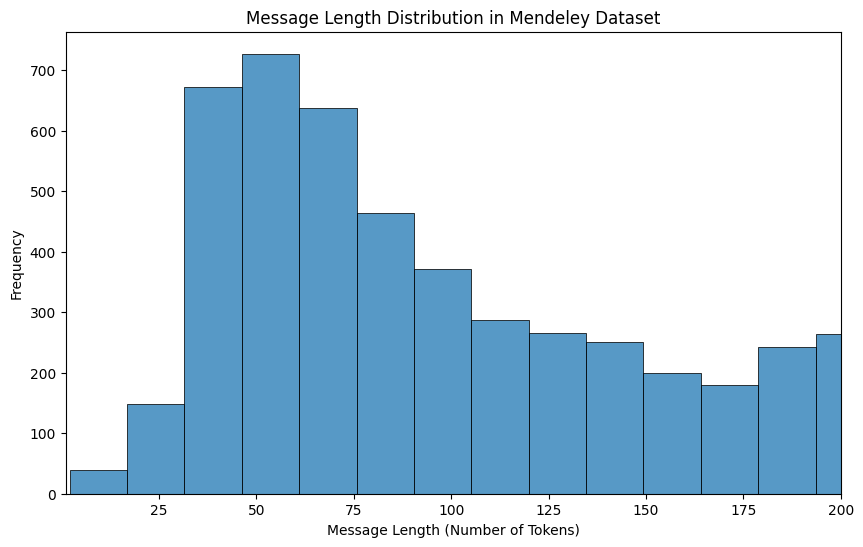

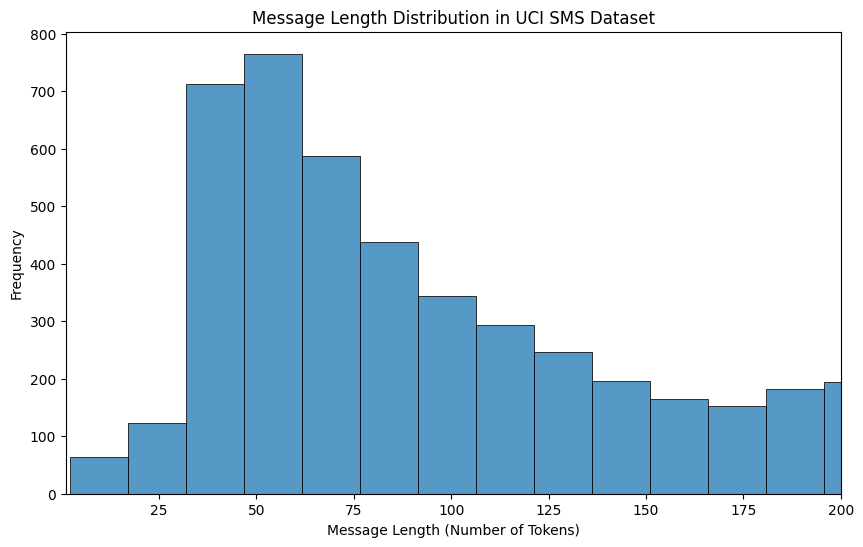

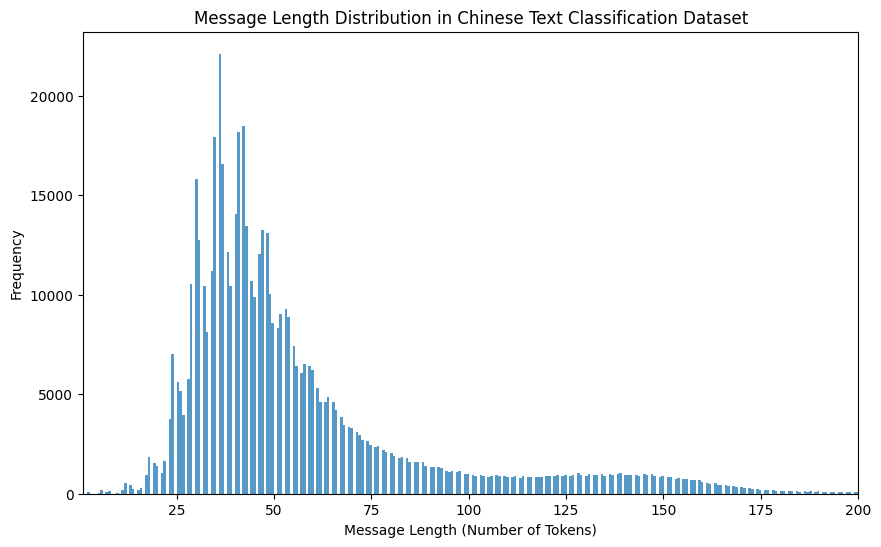

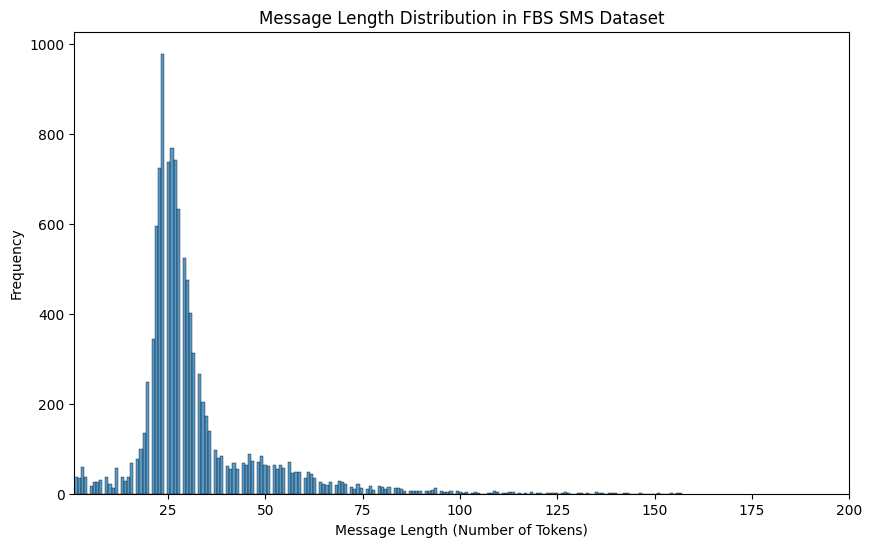

In [53]:
# Function to tokenize cleaned text and remove spaces
def tokenize_and_clean(text):
    if not isinstance(text, str):
        return []
    return [token for token in text.split() if token.strip()]

# Function to calculate message lengths by number of tokens
def calculate_message_lengths_eng(df):
    df['LENGTH'] = df['TOKENIZED_TEXT'].apply(len)
# Function to calculate message lengths by number of tokens

def calculate_message_lengths_chn(df, language='en'):
    df['TOKENIZED_TEXT'] = df['CLEANED_TEXT'].fillna('').apply(tokenize_and_clean)
    df['LENGTH'] = df['TOKENIZED_TEXT'].apply(len)
# Calculate message lengths for each dataset
calculate_message_lengths_eng(mendeley_df)
calculate_message_lengths_eng(uci_df)
calculate_message_lengths_eng(chinese_text_classification_df)
calculate_message_lengths_chn(fbs_sms_df)

# Function to plot message length distribution
def plot_message_length_distribution(df, title):
    plt.figure(figsize=(10, 6))
    sns.histplot(df['LENGTH'])
    plt.title(f'Message Length Distribution in {title}')
    plt.xlim(1,200)
    plt.xlabel('Message Length (Number of Tokens)')
    plt.ylabel('Frequency')
    plt.show()

# Plot message length distribution for each dataset
plot_message_length_distribution(mendeley_df, 'Mendeley Dataset')
plot_message_length_distribution(uci_df, 'UCI SMS Dataset')
plot_message_length_distribution(chinese_text_classification_df, 'Chinese Text Classification Dataset')
plot_message_length_distribution(fbs_sms_df, 'FBS SMS Dataset')

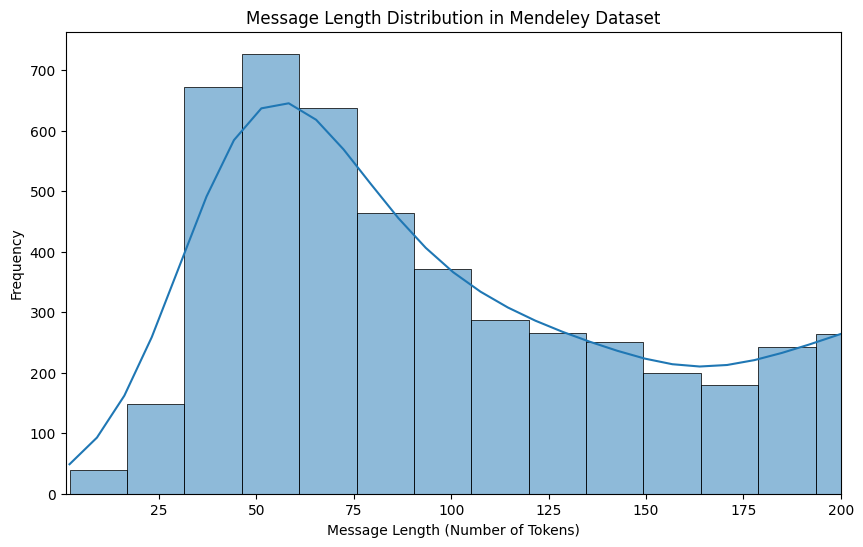

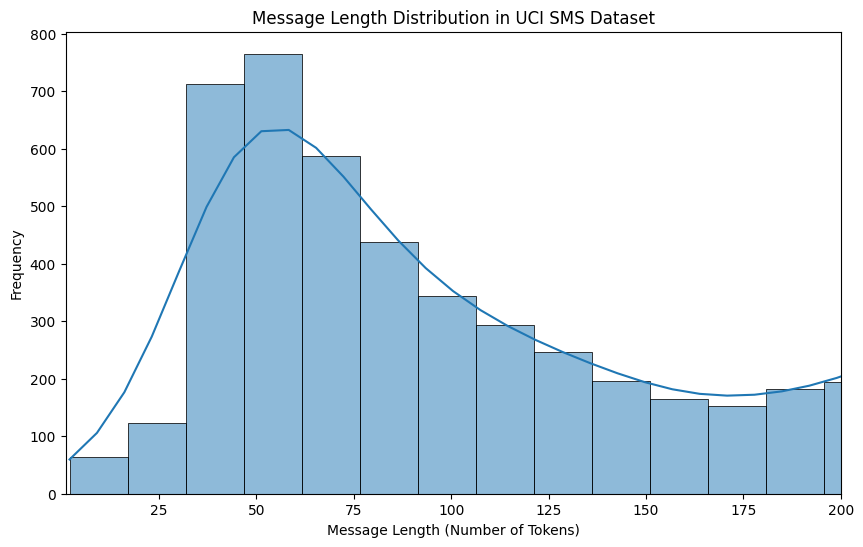

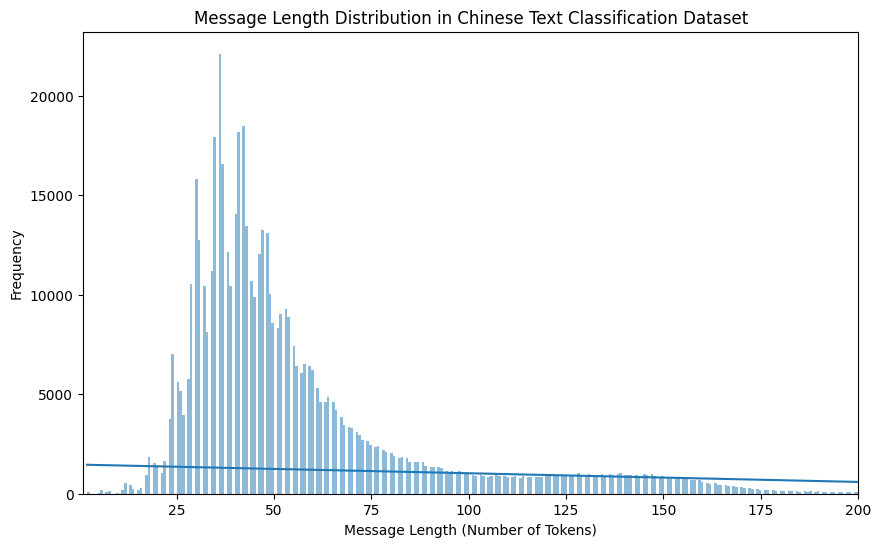

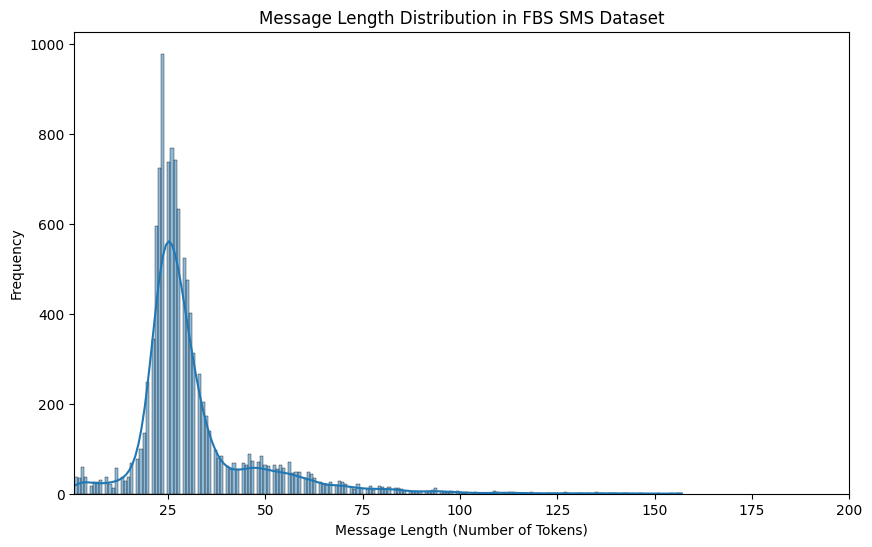

In [54]:
# Function to tokenize cleaned text and remove spaces
def tokenize_and_clean(text):
    if not isinstance(text, str):
        return []
    return [token for token in text.split() if token.strip()]

# Function to calculate message lengths by number of tokens
def calculate_message_lengths_eng(df):
    df['LENGTH'] = df['TOKENIZED_TEXT'].apply(len)
# Function to calculate message lengths by number of tokens

def calculate_message_lengths_chn(df, language='en'):
    df['TOKENIZED_TEXT'] = df['CLEANED_TEXT'].fillna('').apply(tokenize_and_clean)
    df['LENGTH'] = df['TOKENIZED_TEXT'].apply(len)
# Calculate message lengths for each dataset
calculate_message_lengths_eng(mendeley_df)
calculate_message_lengths_eng(uci_df)
calculate_message_lengths_eng(chinese_text_classification_df)
calculate_message_lengths_chn(fbs_sms_df)

# Function to plot message length distribution
def plot_message_length_distribution(df, title):
    plt.figure(figsize=(10, 6))
    sns.histplot(df['LENGTH'],kde=True)
    plt.title(f'Message Length Distribution in {title}')
    plt.xlim(1,200)
    plt.xlabel('Message Length (Number of Tokens)')
    plt.ylabel('Frequency')
    plt.show()

# Plot message length distribution for each dataset
plot_message_length_distribution(mendeley_df, 'Mendeley Dataset')
plot_message_length_distribution(uci_df, 'UCI SMS Dataset')
plot_message_length_distribution(chinese_text_classification_df, 'Chinese Text Classification Dataset')
plot_message_length_distribution(fbs_sms_df, 'FBS SMS Dataset')

In [47]:
chinese_text_classification_df


,LABEL,TEXT,CLEANED_TEXT,HAS_URL,HAS_EMAIL,HAS_PHONE,TOKENIZED_TEXT,LENGTH
0,0,商业秘密的秘密性那是维系其商业价值和垄断地位的前提条件之一,商业秘密的秘密性那是维系其商业价值和垄断地位的前提条件之一,False,False,False,"['商业秘密', '秘密性', '维系', '商业价值', '垄断', '地位', '前提条件']",49
1,1,南口阿玛施新春第一批限量春装到店啦   春暖花开淑女裙、冰蓝色公主衫 ...,南口阿玛施新春第一批限量春装到店啦 春暖花开淑女裙冰蓝色公主衫 气质粉小...,False,False,False,"['南口', '阿玛施', '新春', '第一批', '限量', '春装', '店', ' ...",197
2,0,带给我们大常州一场壮观的视觉盛宴,带给我们大常州一场壮观的视觉盛宴,False,False,False,"['带给', '大', '常州', '一场', '壮观', '视觉', '盛宴']",41
3,0,有原因不明的泌尿系统结石等,有原因不明的泌尿系统结石等,False,False,False,"['原因', '不明', '泌尿系统', '结石']",26
4,0,23年从盐城拉回来的麻麻的嫁妆,23年从盐城拉回来的麻麻的嫁妆,False,False,False,"['23', '年', '盐城', '拉回来', '麻麻', '嫁妆']",36
...,...,...,...,...,...,...,...,...
567354,0,SituGunung湖的早晨这里是挪威,situgunung湖的早晨这里是挪威,False,False,False,"['situgunung', '湖', '早晨', '挪威']",31
567355,0,“楼顶别墅”一时间成为众矢之的,楼顶别墅一时间成为众矢之的,False,False,False,"['楼顶', '别墅', '一时间', '成为', '众矢之的']",33
567356,0,人人投市估值将达到10亿元人民币,人人投市估值将达到10亿元人民币,False,False,False,"['人人', '投市', '估值', '达到', '10', '亿元', '人民币']",43
567357,0,同样是发生在南京的两起执法事件,同样是发生在南京的两起执法事件,False,False,False,"['同样', '发生', '南京', '两起', '执法', '事件']",36


In [5]:
import pandas as pd
from transformers import pipeline
import torch 
if torch.cuda.is_available():
    device = torch.device("cuda")
    print("Using GPU:", torch.cuda.get_device_name(0))
else:
    device = torch.device("cpu")
    print("CUDA is not available. Using CPU instead.")
# Load DataFrames (replace with actual file paths)
mendeley_df = pd.read_csv('processed_data/mendeley_df.csv')
hypothesis_template="This phishing text manipulates user by using {}."
# Define manipulation categories
categories = ["urgency", "greed", "fear", "authority", "scarcity"]

# Load zero-shot classification pipeline
classifier = pipeline('zero-shot-classification', model='facebook/bart-large-mnli')

# Separate ham, spam, and smishing
ham_df = mendeley_df[mendeley_df['LABEL'] == 0]
spam_df = mendeley_df[mendeley_df['LABEL'] == 1]
smishing_df = mendeley_df[mendeley_df['LABEL'] == 2]
print(len(smishing_df))

# Note: This operation can be time-consuming for large datasets
smishing_df['Predicted Category'] = smishing_df['TEXT'].apply(
    lambda x: classifier(x, candidate_labels=categories)['labels'][0]
)

print(smishing_df[['TEXT', 'Predicted Category']])



CUDA is not available. Using CPU instead.
616


KeyboardInterrupt: 

In [10]:
import torch
from transformers import AutoModelForSequenceClassification, AutoTokenizer, ZeroShotClassificationPipeline
from shap import Explainer, plots
from typing import Union, List

weights = "facebook/bart-large-mnli"

# Check if GPU is available and set the device accordingly
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

example_texts = ["U R entitled to Update to the latest colour mobiles with camera for Free! Call The Mobile Update Co FREE on 08002986030"]
#example_texts = ["I am happy to see you.","That was disappointing.","I would be lying if I said that movie was good."]
hypothesis_template="This phishing text manipulates user by evoking their emotion in {}."
# Define manipulation categories
categories = ["urgency", "greed", "fear", "curiosity", "anxiety","trust"]

model = AutoModelForSequenceClassification.from_pretrained(weights).to(device)
tokenizer = AutoTokenizer.from_pretrained(weights)

class MyZeroShotClassificationPipeline(ZeroShotClassificationPipeline):
    def __init__(self, model, tokenizer):
        super().__init__(model=model, tokenizer=tokenizer, device=device.index if device.type == 'cuda' else -1)  # Pass device to the superclass
        self.workaround_labels = None
        self.workaround_hypothesis_template = None

    def __call__(self, *args, **kwargs):
        o = super().__call__(args[0], self.workaround_labels, hypothesis_template=self.workaround_hypothesis_template)[0]
        return [[{"label": x[0], "score": x[1]} for x in zip(o["labels"], o["scores"])]]

    def set_labels_workaround(self, labels: Union[str, List[str]]):
        self.workaround_labels = labels

    def set_hypothesis_template_workaround(self, hypothesis_template: str):
        self.workaround_hypothesis_template = hypothesis_template

pipe = MyZeroShotClassificationPipeline(model, tokenizer)

# Set labels and hypothesis template
pipe.set_labels_workaround(categories)
pipe.set_hypothesis_template_workaround(hypothesis_template)
# In the following, we address issue 2.
model.config.label2id.update({v:k for k,v in enumerate(categories)})
model.config.id2label.update({k:v for k,v in enumerate(categories)})


def score_and_visualize(input_texts):
    
 
    print(input_texts)
    result = pipe([input_texts])
    print(result)

    #explainer = Explainer(pipe)
    #shap_values = explainer(input_texts)
    #print(shap_values)

    #plots.text(shap_values)

score_and_visualize(example_texts)

Using device: cpu
['U R entitled to Update to the latest colour mobiles with camera for Free! Call The Mobile Update Co FREE on 08002986030']
[[{'label': 'trust', 'score': 0.24419213831424713}, {'label': 'curiosity', 'score': 0.19583547115325928}, {'label': 'urgency', 'score': 0.15344631671905518}, {'label': 'fear', 'score': 0.15083040297031403}, {'label': 'anxiety', 'score': 0.12974382936954498}, {'label': 'greed', 'score': 0.1259518414735794}]]


In [11]:
mendeley_df = pd.read_csv('processed_data/mendeley_df.csv')
# Separate ham, spam, and smishing
ham_df = mendeley_df[mendeley_df['LABEL'] == 0]
spam_df = mendeley_df[mendeley_df['LABEL'] == 1]
smishing_df = mendeley_df[mendeley_df['LABEL'] == 2]
print(len(smishing_df))

# Note: This operation can be time-consuming for large datasets
smishing_df['Predicted Category'] = smishing_df['TEXT'].apply(
    lambda x: score_and_visualize(x)
)

print(smishing_df[['TEXT', 'Predicted Category']])

616
Please Stay At Home. To encourage the notion of staying at home. All tax-paying citizens are entitled to �305.96 or more emergency refund. smsg.io/fCVbD
[[{'label': 'urgency', 'score': 0.24172024428844452}, {'label': 'curiosity', 'score': 0.21043555438518524}, {'label': 'trust', 'score': 0.16959555447101593}, {'label': 'fear', 'score': 0.16475163400173187}, {'label': 'anxiety', 'score': 0.149016335606575}, {'label': 'greed', 'score': 0.06448069959878922}]]
BankOfAmerica Alert 137943. Please follow http://bit.do/cgjK-and re-activate
[[{'label': 'urgency', 'score': 0.20226432383060455}, {'label': 'trust', 'score': 0.19503402709960938}, {'label': 'fear', 'score': 0.18184088170528412}, {'label': 'curiosity', 'score': 0.1779046654701233}, {'label': 'anxiety', 'score': 0.1601817011833191}, {'label': 'greed', 'score': 0.08277437090873718}]]
UR awarded a City Break and could WIN a £200 Summer Shopping spree every WK. Txt STORE to 88039 . SkilGme. TsCs087147403233
[[{'label': 'trust', 'scor

/tmp/ipykernel_152361/963976924.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  smishing_df['Predicted Category'] = smishing_df['TEXT'].apply(


In [13]:
smishing_df.to_csv("zero-shot-smishing.csv")